# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


In [11]:
# Read the socioeconomic data for each Local Government Area.
SEIFA = pd.read_csv("files/ABS_SEIFA_LGA.csv")
SEIFA.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985


**DATA CLEANING**

> In order to produce clean data, this section checks for and removes missing values in both sa_vouchers and SEIFA.

**sa_vouchers**

In [12]:
# Print full summary
sa_vouchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125446 entries, 0 to 127525
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Participant_ID              125446 non-null  int64 
 1   Participant_Suburb          125446 non-null  object
 2   Club_Previous_Member        125446 non-null  object
 3   Participant_ATSI_Indicator  125446 non-null  object
 4   Participant_CALD_Indicator  125446 non-null  object
 5   Participant_Sex             125446 non-null  object
 6   Voucher_Value               125446 non-null  int64 
 7   Club_Name                   125446 non-null  object
 8   Voucher_Sport               125446 non-null  object
 9   Participant_LGA             125446 non-null  object
 10  Participant_Electorate      125446 non-null  object
 11  Voucher_Completion_Date     125446 non-null  object
 12  Voucher_Claim_Year          125446 non-null  int64 
dtypes: int64(3), object(10)
memor

In [13]:
# Return the number of missing values in the data set
sa_vouchers.isnull().sum()

Participant_ID                0
Participant_Suburb            0
Club_Previous_Member          0
Participant_ATSI_Indicator    0
Participant_CALD_Indicator    0
Participant_Sex               0
Voucher_Value                 0
Club_Name                     0
Voucher_Sport                 0
Participant_LGA               0
Participant_Electorate        0
Voucher_Completion_Date       0
Voucher_Claim_Year            0
dtype: int64

The Voucher Completion Date column in sa_vouchers appears to be the only one with missing data, and it is missing with 2080 values. Since this data is irrelevant to the following questions, it is appropriate to remove the rows containing these nulls.

Nan values should be removed as part of the data cleaning process. This was taken care of in this line.

In [14]:
# Remove rows and columns with Null/NaN values
sa_vouchers.dropna(inplace = True)

Checking to see whether the columns satisfy expectations

In [8]:
sa_vouchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125446 entries, 0 to 127525
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Participant_ID              125446 non-null  int64 
 1   Participant_Suburb          125446 non-null  object
 2   Club_Previous_Member        125446 non-null  object
 3   Participant_ATSI_Indicator  125446 non-null  object
 4   Participant_CALD_Indicator  125446 non-null  object
 5   Participant_Sex             125446 non-null  object
 6   Voucher_Value               125446 non-null  int64 
 7   Club_Name                   125446 non-null  object
 8   Voucher_Sport               125446 non-null  object
 9   Participant_LGA             125446 non-null  object
 10  Participant_Electorate      125446 non-null  object
 11  Voucher_Completion_Date     125446 non-null  object
 12  Voucher_Claim_Year          125446 non-null  int64 
dtypes: int64(3), object(10)
memor

Displaying cleaned data

In [9]:
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


**SEIFA**

In [15]:
# Print full summary
SEIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   LGA_2011                       9024 non-null   int64 
 1   Local Government Areas - 2011  9024 non-null   object
 2   INDEX_TYPE                     9024 non-null   object
 3   Index Type                     9024 non-null   object
 4   MEASURE                        9024 non-null   object
 5   Measure                        9024 non-null   object
 6   Value                          9024 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 493.6+ KB


In [16]:
# Return the number of missing values in the data set
sa_vouchers.isnull().sum()

Participant_ID                0
Participant_Suburb            0
Club_Previous_Member          0
Participant_ATSI_Indicator    0
Participant_CALD_Indicator    0
Participant_Sex               0
Voucher_Value                 0
Club_Name                     0
Voucher_Sport                 0
Participant_LGA               0
Participant_Electorate        0
Voucher_Completion_Date       0
Voucher_Claim_Year            0
dtype: int64

Since there are no missing values, we do not need to worry about eliminating NaN values in SEIFA. 

**EXPLORATORY DATA ANALYSIS**

> Now that the data has been cleaned, we may investigate the following questions.

In the SEIFA data, each Local Government Area (LGA) has its own row, however the names of the LGAs are preceded by a letter or letters in brackets. In order to correlate this with the voucher data, I will remove this and convert it to uppercase.

Each LGA's data contains a wide range of factors, some of which may be important to my study.

In [41]:
# Examine the data: check number of rows and number of columns
sa_vouchers.shape

(127526, 13)

In [40]:
# Print full summary
sa_vouchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127526 entries, 0 to 127525
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Participant_ID              127526 non-null  int64 
 1   Participant_Suburb          127526 non-null  object
 2   Club_Previous_Member        127526 non-null  object
 3   Participant_ATSI_Indicator  127526 non-null  object
 4   Participant_CALD_Indicator  127526 non-null  object
 5   Participant_Sex             127526 non-null  object
 6   Voucher_Value               127526 non-null  int64 
 7   Club_Name                   127526 non-null  object
 8   Voucher_Sport               127526 non-null  object
 9   Participant_LGA             127526 non-null  object
 10  Participant_Electorate      127526 non-null  object
 11  Voucher_Completion_Date     125446 non-null  object
 12  Voucher_Claim_Year          127526 non-null  int64 
dtypes: int64(3), object(10)
memor

In [42]:
# Look at the statistical summary of the dataframe
sa_vouchers.describe()

,Participant_ID,Voucher_Value,Voucher_Claim_Year
count,1.275260e+05,127526.000000,127526.000000
mean,1.063764e+06,49.663951,2015.915100
std,3.681374e+04,2.700970,0.765087
min,1.000002e+06,5.000000,2015.000000
25%,1.031883e+06,50.000000,2015.000000
50%,1.063764e+06,50.000000,2016.000000
75%,1.095646e+06,50.000000,2017.000000
max,1.127526e+06,50.000000,2017.000000


**DESCRIBE THE DISTRIBUTION OF VOUCHERS BY: LGA, SPORT - WHICH REGIONS/SPORTS STAND OUT?**

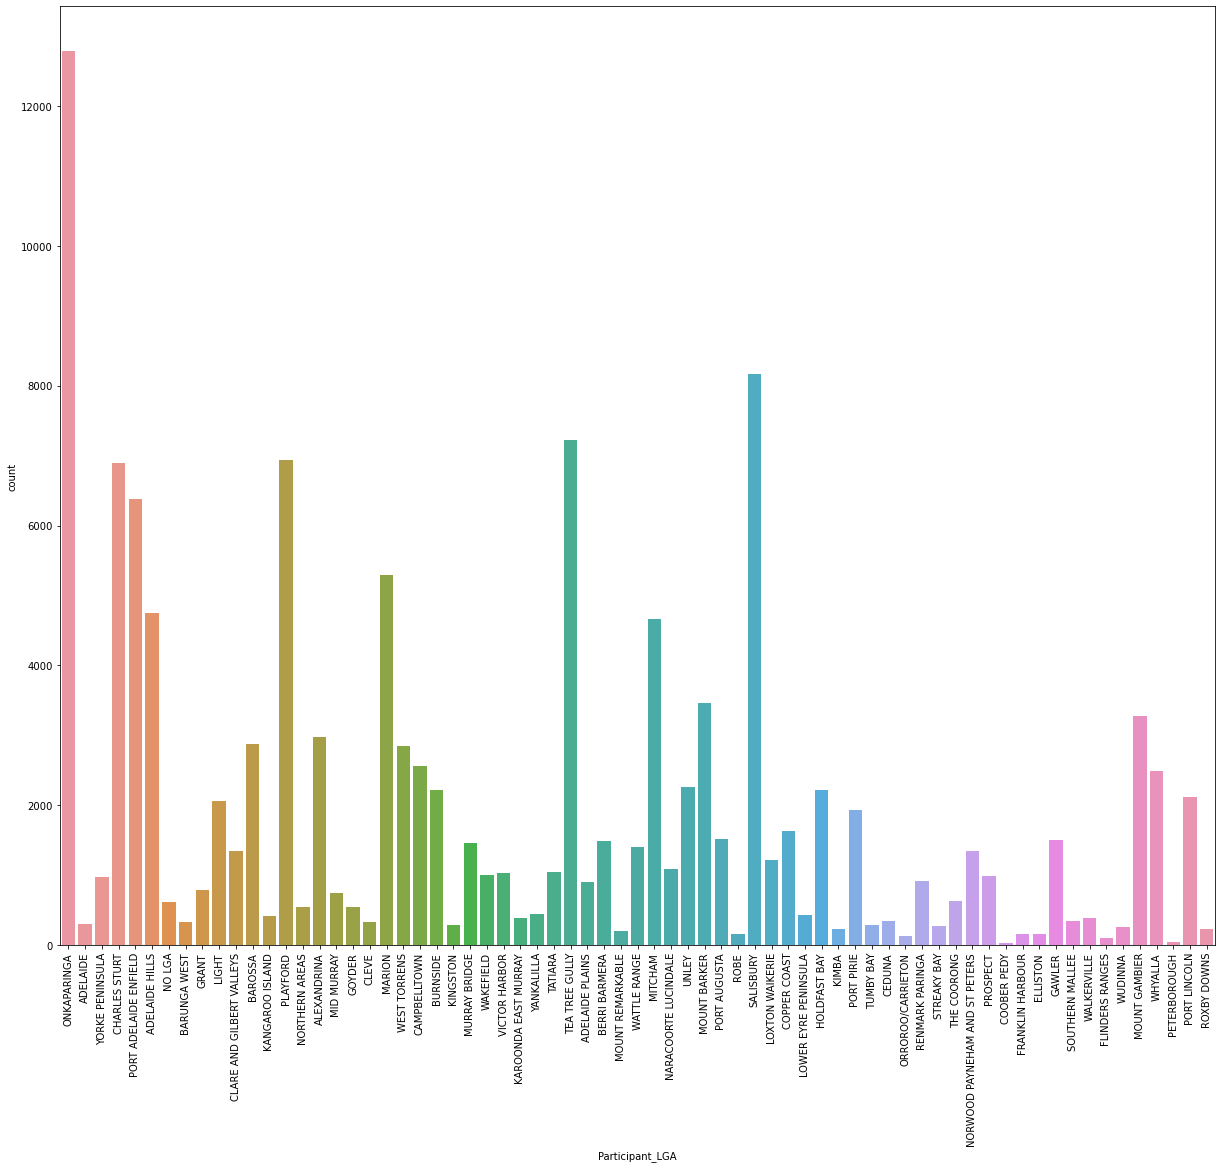

In [5]:
plt.figure(figsize=(20.7,17.27))
sns.countplot(x='Participant_LGA', data = sa_vouchers)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

In [6]:
# The number of vouchers distributed to various LGAs is shown below.
total =sa_vouchers.groupby('Participant_LGA')['Participant_LGA'].count().sort_values(ascending=False)
print(total)

Participant_LGA
ONKAPARINGA          12782
SALISBURY             8169
TEA TREE GULLY        7219
PLAYFORD              6940
CHARLES STURT         6897
                     ...  
FRANKLIN HARBOUR       155
ORROROO/CARRIETON      137
FLINDERS RANGES        102
PETERBOROUGH            45
COOBER PEDY             39
Name: Participant_LGA, Length: 69, dtype: int64


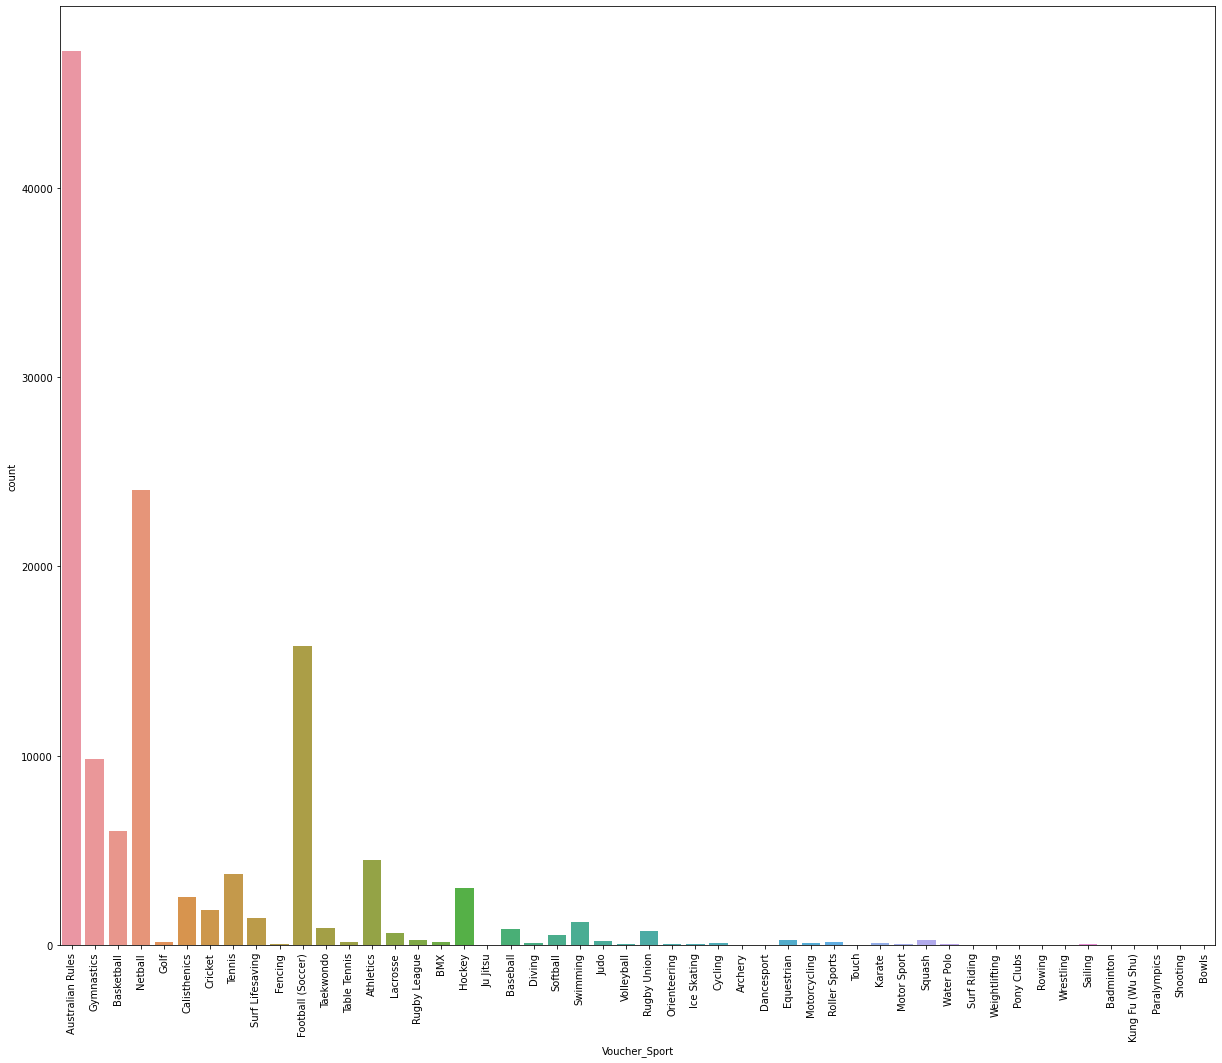

In [47]:
plt.figure(figsize=(20.7,17.27))
sns.countplot(x='Voucher_Sport', data = sa_vouchers)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

In [45]:
# The number of vouchers given out in each Sports category is listed below.
df=sa_vouchers.groupby('Voucher_Sport')['Voucher_Sport'].count().sort_values(ascending=False)
df

Voucher_Sport
Australian Rules     47224
Netball              24017
Football (Soccer)    15775
Gymnastics            9823
Basketball            6016
Athletics             4518
Tennis                3742
Hockey                3026
Calisthenics          2522
Cricket               1875
Surf Lifesaving       1442
Swimming              1204
Taekwondo              910
Baseball               865
Rugby Union            734
Lacrosse               656
Softball               548
Rugby League           270
Equestrian             265
Squash                 249
Judo                   210
Golf                   188
Table Tennis           166
BMX                    157
Roller Sports          148
Cycling                105
Motorcycling            97
Karate                  91
Diving                  89
Ice Skating             86
Fencing                 84
Volleyball              62
Orienteering            56
Water Polo              48
Motor Sport             45
Sailing                 40
Archery       

**ARE SOME SPORTS MORE POPULAR IN DIFFERENT PARTS OF THE STATE?**

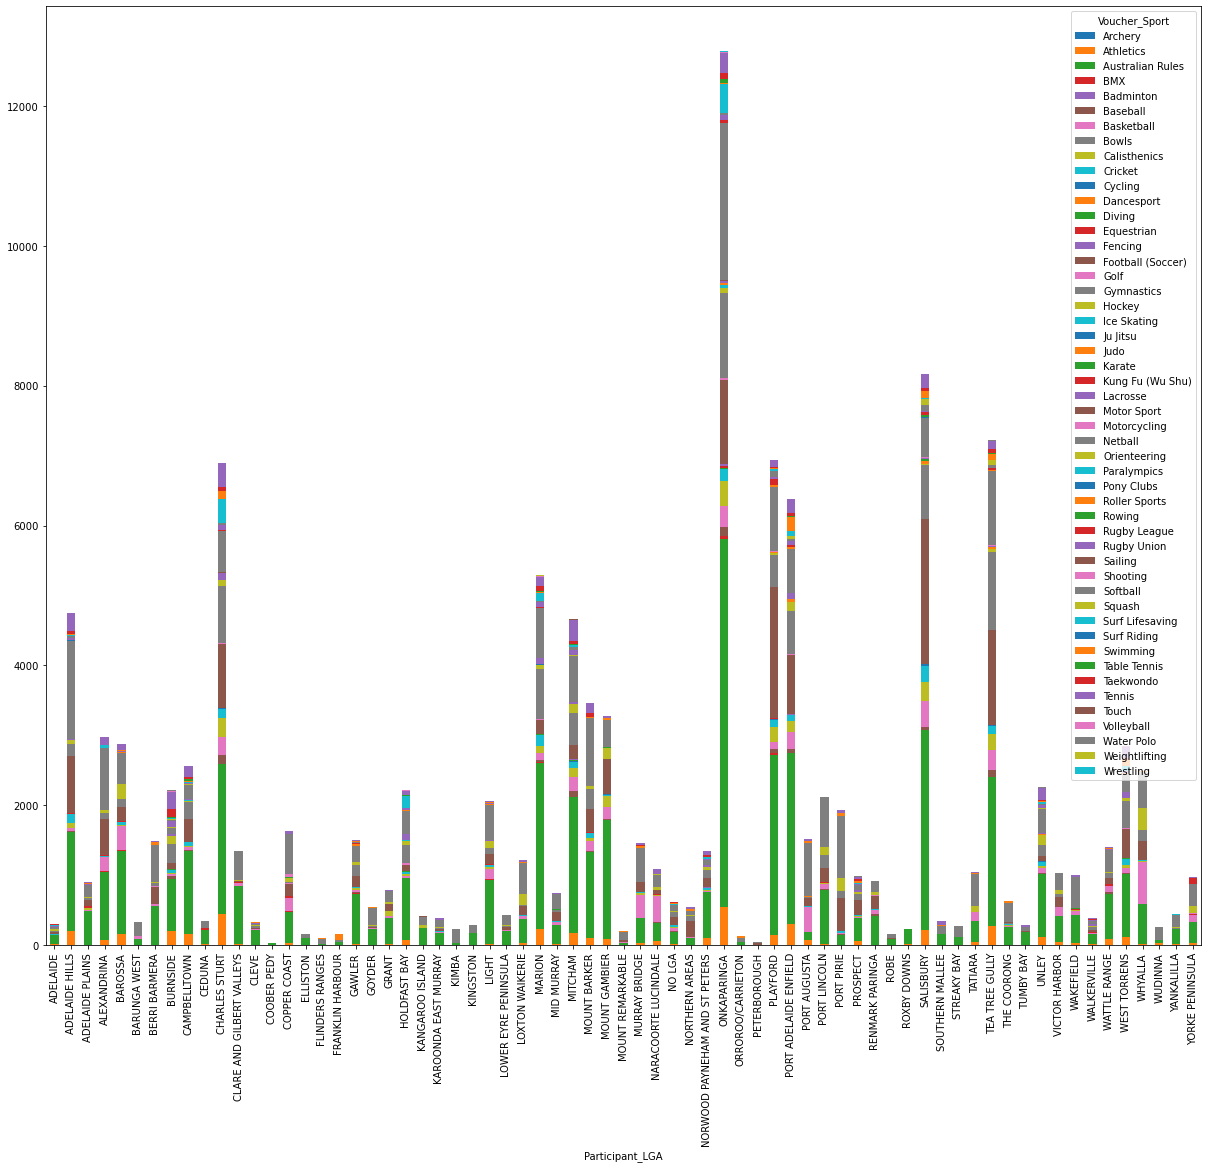

In [9]:
sa_vouchers.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Participant_ID', aggfunc=len).sort_values(by='Participant_LGA', ascending=True).plot.bar(rot=0, stacked=True, figsize=[20.7,17.27])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

For a better perspective, the dataframe has been filtered for sports and LGAs having more than 3000 voucher data.

In [10]:
Top_Sport = ['Australian Rules', 'Netball','Football (Soccer)','Gymnastics','Basketball','Athletics','Tennis','Hockey'] 
Top_LGA = ['ONKAPARINGA','SALISBURY','TEA TREE GULLY','PLAYFORD','CHARLES STURT','PORT ADELAIDE ENFIELD','MARION','ADELAIDE HILLS' ,'MITCHAM' ,'MOUNT BARKER','MOUNT GAMBIER'   ] 
    
# selecting rows based on condition 
filter_data = sa_vouchers[sa_vouchers['Voucher_Sport'].isin(Top_Sport)] 
filter_data = filter_data[filter_data['Participant_LGA'].isin(Top_LGA)] 

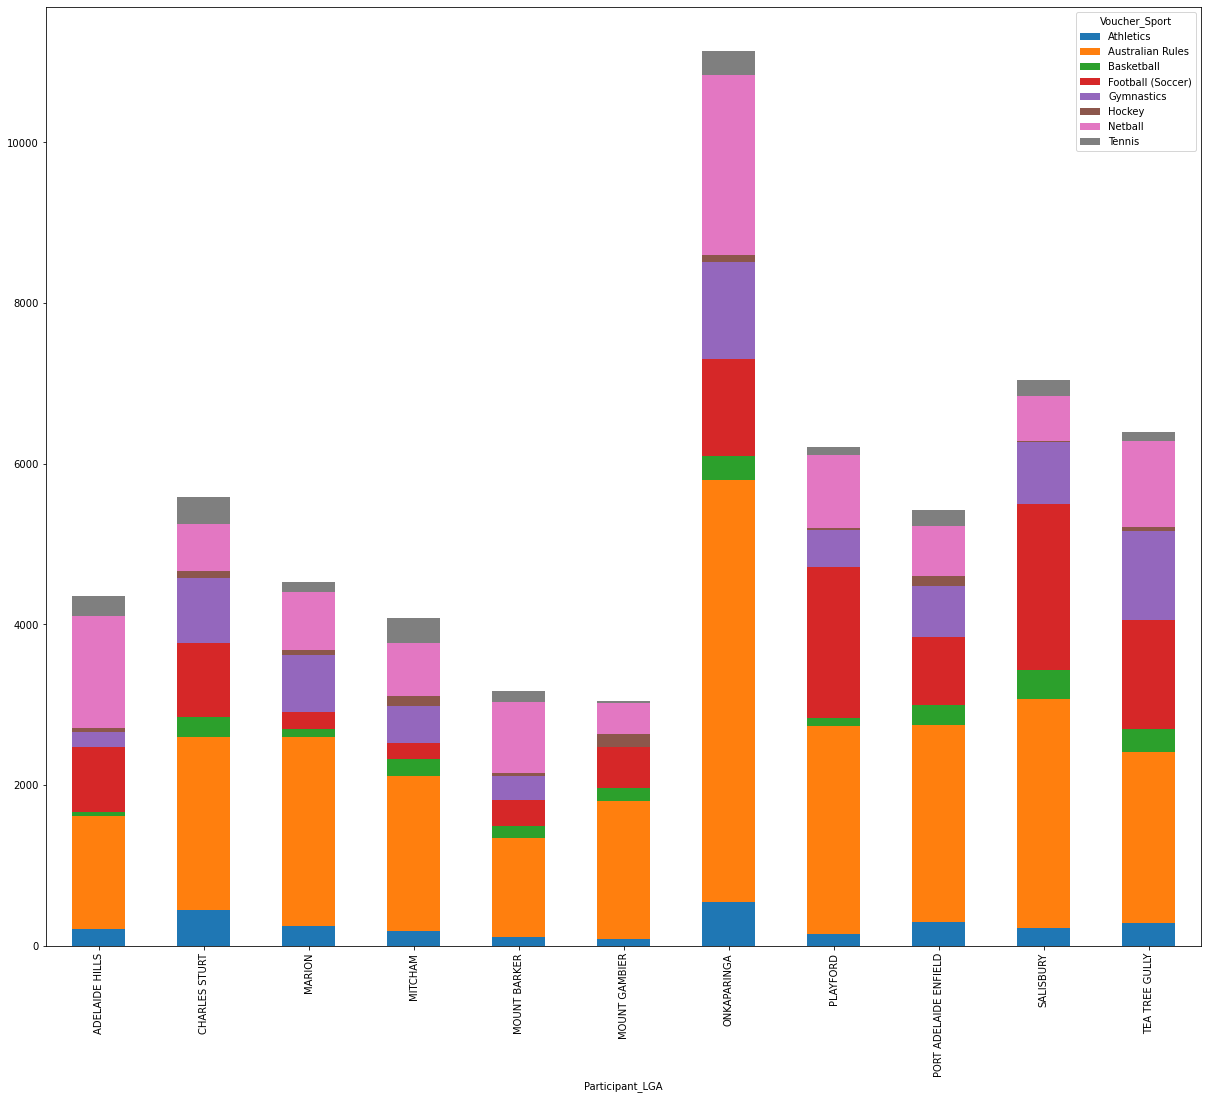

In [11]:
filter_data.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Participant_ID', aggfunc=len).sort_values(by='Participant_LGA', ascending=True).plot.bar(rot=0, stacked=True, figsize=[20.7,17.27])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

Australian Rules is a popular sport in the majority of the state. Some sports, however, such as football, netball, and gymnastics, are popular in only a few states and not in an equal proportion across South Australia. Football appears to be popular in Playford and Sallisbury, but not in Marion or Mtcham. Gymnastics seems to be popular in Onikparinga and Tree Gully, but not in Mount Barker or the Adelaide Hills.

**ARE ANY LGAS OVER/UNDER REPRESENTED IN THEIR USE OF VOUCHERS?**

There are many LGAs with a significant number of vouchers.

In [17]:
# After reading the SEIFA data, establish an LGA column by eliminating the letters in brackets and changing them to uppercase.
SEIFA = pd.read_csv("files/ABS_SEIFA_LGA.csv")
LGA = SEIFA["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
SEIFA['LGA'] = LGA
SEIFA.head(20)

<ipython-input-17-fee1c4335463>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  LGA = SEIFA["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ
5,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,727,ARMIDALE DUMARESQ
6,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1120,ARMIDALE DUMARESQ
7,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,24122,ARMIDALE DUMARESQ
8,10150,Ashfield (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,1031,ASHFIELD
9,10150,Ashfield (A),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,926,ASHFIELD


Since there are many rows per LGA, we must utilise `pivot_table` to produce a new data frame with one row per LGA. Here's how to do it in order to generate a table with the various SCORE metrics and the population (URP) field.

In [13]:
SEIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   LGA_2011                       9024 non-null   int64 
 1   Local Government Areas - 2011  9024 non-null   object
 2   INDEX_TYPE                     9024 non-null   object
 3   Index Type                     9024 non-null   object
 4   MEASURE                        9024 non-null   object
 5   Measure                        9024 non-null   object
 6   Value                          9024 non-null   int64 
 7   LGA                            9024 non-null   object
dtypes: int64(2), object(6)
memory usage: 564.1+ KB


In [15]:
SEIFA.LGA.unique()

array(['ALBURY', 'ARMIDALE DUMARESQ', 'ASHFIELD', 'AUBURN', 'BALLINA',
       'BALRANALD', 'BANKSTOWN', 'BATHURST REGIONAL', 'BEGA VALLEY',
       'BELLINGEN', 'BERRIGAN', 'BLACKTOWN', 'BLAND', 'BLAYNEY',
       'BLUE MOUNTAINS', 'BOGAN', 'BOMBALA', 'BOOROWA', 'BOTANY BAY',
       'BOURKE', 'BREWARRINA', 'BROKEN HILL', 'BURWOOD', 'BYRON',
       'CABONNE', 'CAMDEN', 'CAMPBELLTOWN', 'CANADA BAY', 'CANTERBURY',
       'CARRATHOOL', 'CENTRAL DARLING', 'CESSNOCK', 'CLARENCE VALLEY',
       'COBAR', 'COFFS HARBOUR', 'CONARGO', 'COOLAMON', 'COOMA-MONARO',
       'COONAMBLE', 'COOTAMUNDRA', 'COROWA SHIRE', 'COWRA', 'DENILIQUIN',
       'DUBBO', 'DUNGOG', 'EUROBODALLA', 'FAIRFIELD', 'FORBES',
       'GILGANDRA', 'GLEN INNES SEVERN', 'GLOUCESTER', 'GOSFORD',
       'GOULBURN MULWAREE', 'GREAT LAKES', 'GREATER HUME SHIRE',
       'GREATER TAREE', 'GRIFFITH', 'GUNDAGAI', 'GUNNEDAH', 'GUYRA',
       'GWYDIR', 'HARDEN', 'HAWKESBURY', 'HAY', 'HOLROYD', 'HORNSBY',
       'HUNTERS HILL', 'HURSTVILLE',

Taking the top five and bottom five LGAs in terms of voucher usage: 

* ONKAPARINGA                       **12782**
* SALISBURY                          **8169**
* TEA TREE GULLY                     **7219**
* PLAYFORD                           **6940**
* CHARLES STURT                      **6897**

**...................................................................**

* FRANKLIN HARBOUR                    **155**
* ORROROO/CARRIETON                   **137**
* FLINDERS RANGES                     **102**
* PETERBOROUGH                         **45**
* COOBER PEDY                          **39**

In [24]:
Top_Bottom_LGA_SEIFA= ['ONKAPARINGA','SALISBURY','TEA TREE GULLY','PLAYFORD','CHARLES STURT','FRANKLIN HARBOUR', 'ORROROO/CARRIETON','FLINDERS RANGES','PETERBOROUGH ','COOBER PEDY'] 

    
# selecting rows based on condition 
SEIFA_filter_df = SEIFA[SEIFA['LGA'].isin(Top_Bottom_LGA_Seifa)] 
SEIFA_filter_df = SEIFA_filter_df[SEIFA_filter_df['MEASURE'] == 'URP']
SEIFA_filter_df [['LGA','Value']].drop_duplicates(subset=None, keep='first', inplace=False)

,LGA,Value
1271,CHARLES STURT,104922
1283,COOBER PEDY,1694
1295,FLINDERS RANGES,1703
1299,FRANKLIN HARBOUR,1271
1395,ONKAPARINGA,159517
1399,ORROROO/CARRIETON,871
1407,PLAYFORD,79082
1443,SALISBURY,129067
1459,TEA TREE GULLY,95461


There is no evidence that LGAs are over or underrepresented since vouchers are distributed based on population. The LGAs with the lowest voucher usage rates are all small in population, and vice versa.

In [27]:
LGA_scores = SEIFA[SEIFA.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = SEIFA[SEIFA.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


**IS THERE A RELATIONSHIP BETWEEN ANY OF THE SEIFA MEASURES AND VOUCHER USE IN AN LGA?**

In [28]:
SEIFA.MEASURE.unique()

array(['SCORE', 'MINS', 'MAXS', 'URP'], dtype=object)

In [29]:
# selecting rows based on condition 

LGA_scores = LGA_scores.drop_duplicates(subset=None, keep='first', inplace=False)

LGA_scores = SEIFA.pivot_table(index="LGA", columns=["MEASURE"], values="Value")
LGA_scores.head(10)

MEASURE,MAXS,MINS,SCORE,URP
LGA,,,,
ADELAIDE,1082.50,759.25,949.25,19606.0
ADELAIDE HILLS,1151.25,952.50,1081.00,38601.0
ALBANY,1149.50,773.75,990.50,33614.0
ALBURY,1179.75,621.75,968.50,47851.0
ALEXANDRINA,1089.50,835.75,989.00,23693.0
ALICE SPRINGS,1152.00,528.50,998.00,25181.0
ALPINE,1080.50,872.25,977.75,11891.0
ANANGU PITJANTJATJARA,871.00,502.75,627.75,2433.0
ARARAT,1095.50,749.75,955.25,11174.0


In [31]:
SEIFA_filter_df = SEIFA[SEIFA['LGA'].isin(Top_Bottom_LGA_SEIFA)] 
SEIFA_filter_df = SEIFA_filter_df[['LGA','MEASURE','Value']]

SEIFA_filter_df = SEIFA_filter_df.pivot_table(index="LGA", columns=["MEASURE"], values="Value")
SEIFA_filter_df

MEASURE,MAXS,MINS,SCORE,URP
LGA,,,,
CHARLES STURT,1106.75,647.50,965.25,104922.0
COOBER PEDY,960.25,807.25,869.75,1694.0
FLINDERS RANGES,1045.75,897.75,959.25,1703.0
FRANKLIN HARBOUR,1023.75,943.50,973.00,1271.0
ONKAPARINGA,1168.25,664.25,990.00,159517.0
ORROROO/CARRIETON,1063.75,948.00,997.75,871.0
PLAYFORD,1135.75,627.50,891.75,79082.0
SALISBURY,1150.75,685.75,945.25,129067.0
TEA TREE GULLY,1173.50,881.50,1027.00,95461.0


As a result, there is no proper relationship emerging from any Measures other than URP. URP is a voucher use indicator based on the simple assumption that the more people there are, the more vouchers are used.

This data frame can then be combined with the vouchers data frame to form a single master data frame that includes both the voucher data and the SEIFA measurements.

In [32]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,MAXS,MINS,SCORE,URP
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,1168.25,664.25,990.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,1168.25,664.25,990.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,1168.25,664.25,990.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,1168.25,664.25,990.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,1168.25,664.25,990.0,159517.0


## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [37]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [39]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-39-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,MAXS,MINS,SCORE,URP
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,1119.00,814.00,981.50,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1222.25,536.75,1035.25,1042074.0
